In [2]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
!unzip data.zip

dyld[73885]: Library not loaded: /usr/local/opt/libunistring/lib/libunistring.2.dylib
  Referenced from: <E7577EC0-B6C8-317B-B41D-A45E35CAD031> /usr/local/Cellar/wget/1.21.2/bin/wget
  Reason: tried: '/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache), '/usr/local/Cellar/libunistring/1.3/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/Cellar/libunistring/1.3/lib/libunistring.2.dylib' (no such file), '/usr/local/Cellar/libunistring/1.3/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache)
unzip:  cannot find or open data.zip, da

In [55]:
import numpy as np
import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [34]:
from keras.losses import BinaryCrossentropy

In [35]:
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.17.1'

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be (200, 200, 3)
- Next, create a convolutional layer (Conv2D):
  - Use 32 filters
  - Kernel size should be (3, 3) (that's the size of the filter)
  - Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
  - Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
  - The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:
- SGD(lr=0.002, momentum=0.8)


## Question 1

Since we have a binary classification problem, what is the best loss function for us?

- mean squared error
- binary crossentropy
- categorical crossentropy
- cosine similarity

Answer is `binary crossentropy`

## Question 2

What's the total number of parameters of the model? You can use the summary method for that.

- 896
- 11214912
- 15896912
- 20072512

In [5]:
input_size = 200

In [17]:
Conv2D?

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
2D convolution layer.

This layer creates a convolution kernel that is convolved with the layer
input over a 2D spatial (or temporal) dimension (height and width) to
produce a tensor of outputs. If `use_bias` is True, a bias vector is created
and added to the outputs. Finally, if `activation` is not `None`, it is
applied to the outputs as well.

Args:
    filters: int, the dimension of the output space (the number of filters
        in the convolution).
    kernel_size: int or tuple/list of 2 integer, specifying the size of the
        convolution windo

In [74]:
def create_cnn_model():
    inputs = tf.keras.Input(shape=(input_size, input_size, 3))
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile the model with SGD optimizer
    optimizer = SGD(learning_rate=0.002, momentum=0.8)

    # Use binary crossentropy
    loss = BinaryCrossentropy()
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [75]:
model = create_cnn_model()
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
def create_cnn_model_with_seqential():
    model = Sequential()

    # Input layer and first Conv2D layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))

    # MaxPooling2D layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(Flatten())

    # Dense hidden layer
    model.add(Dense(64, activation='relu'))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model with SGD optimizer
    optimizer = SGD(learning_rate=0.002, momentum=0.8)
    
    loss = BinaryCrossentropy()
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
cnn_model = create_cnn_model_with_seqential()
cnn_model.summary()

/Users/piotrstanczak/Library/Caches/pypoetry/virtualenvs/08-deep-learning-R8-US2_N-py3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

Answer is `20,072,512`

In [30]:
train_gen = ImageDataGenerator(rescale=1./255)
train_gen.flow_from_directory?

Signature:
train_gen.flow_from_directory(
    directory,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
)
Docstring: <no docstring>
File:      ~/Library/Caches/pypoetry/virtualenvs/08-deep-learning-R8-US2_N-py3.11/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py
Type:      method

In [76]:
train_gen = ImageDataGenerator(rescale=1./255)
train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(input_size, input_size),
    class_mode="binary",
    batch_size=20,
    shuffle=True
)

test_gen = ImageDataGenerator(rescale=1./255)
test_ds = test_gen.flow_from_directory(
    './data/test',
    target_size=(input_size, input_size),
    class_mode="binary",
    batch_size=20,
    shuffle=True
)

Found 800 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [77]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.4878 - loss: 0.7116 - val_accuracy: 0.5721 - val_loss: 0.6707
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.6358 - loss: 0.6270 - val_accuracy: 0.6169 - val_loss: 0.6384
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.7058 - loss: 0.5726 - val_accuracy: 0.6219 - val_loss: 0.6118
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.7070 - loss: 0.5606 - val_accuracy: 0.6716 - val_loss: 0.5975
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.7127 - loss: 0.5392 - val_accuracy: 0.6965 - val_loss: 0.5919
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.7341 - loss: 0.5060 - val_accuracy: 0.6567 - val_loss: 0.6170
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7465 - loss: 0.5110 - val_accuracy: 0.6567 - val_loss: 0.6308
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.7896 - loss: 0.4505 - val_accuracy: 0.

## Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.10
- 0.32
- 0.50
- 0.72

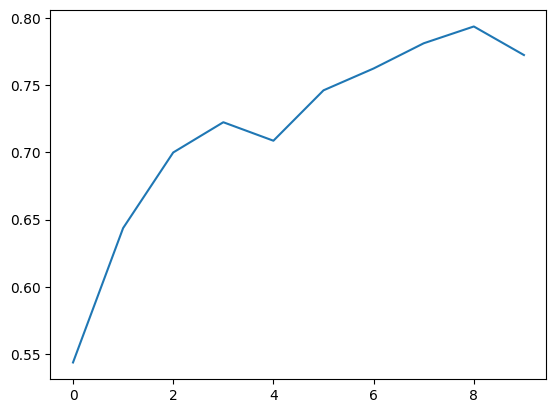

In [78]:
plt.plot(history.history["accuracy"], label=f"Train")

In [79]:
training_accuracies = history.history['accuracy']
median_accuracy = np.median(training_accuracies)
print(f"Median Training Accuracy: {median_accuracy}")

Median Training Accuracy: 0.734375


Answer is `0.72`

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.028
- 0.068
- 0.128
- 0.168

In [80]:
history.history

{'accuracy': [0.543749988079071,
  0.643750011920929,
  0.699999988079071,
  0.7225000262260437,
  0.7087500095367432,
  0.7462499737739563,
  0.762499988079071,
  0.78125,
  0.793749988079071,
  0.7724999785423279],
 'loss': [0.687194287776947,
  0.6298937797546387,
  0.5746511220932007,
  0.5483056306838989,
  0.5343239307403564,
  0.4927222430706024,
  0.4811168313026428,
  0.4469012916088104,
  0.4359292685985565,
  0.4730910062789917],
 'val_accuracy': [0.572139322757721,
  0.6169154047966003,
  0.6218905448913574,
  0.6716417670249939,
  0.6965174078941345,
  0.6567164063453674,
  0.6567164063453674,
  0.6865671873092651,
  0.6716417670249939,
  0.6517412662506104],
 'val_loss': [0.670741081237793,
  0.6383951902389526,
  0.6117985844612122,
  0.5974838733673096,
  0.5918716788291931,
  0.6169652342796326,
  0.6307529211044312,
  0.6097338199615479,
  0.6457626819610596,
  0.7165142297744751]}

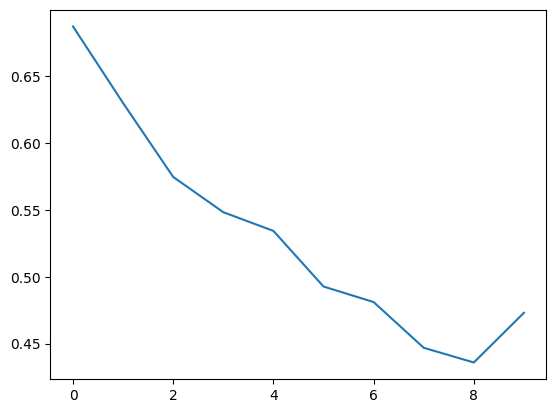

In [81]:
plt.plot(history.history["loss"], label=f"Train")

In [82]:
training_loss = history.history['loss']
std_loss = np.std(training_loss)
print(f"Standard Deviation Training Loss: {std_loss}")

Standard Deviation Training Loss: 0.07733508136944499


Answer is `0.068`

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- rotation_range=50,
- width_shift_range=0.1,
- height_shift_range=0.1,
- zoom_range=0.1,
- horizontal_flip=True,
- fill_mode='nearest'

In [83]:
train_gen_aug = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,    
    zoom_range=0.1,    
    horizontal_flip=True,
    fill_mode="nearest"
)
train_ds_aug = train_gen_aug.flow_from_directory(
    './data/train',
    target_size=(input_size, input_size),
    class_mode="binary",
    batch_size=20,
    shuffle=True
)

Found 800 images belonging to 2 classes.


## Question 5

Let's train our model for 10 more epochs using the same code as previously.

> Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.26
- 0.56
- 0.86
- 1.16

In [84]:
history_aug = model.fit(
    train_ds_aug,
    epochs=10,
    validation_data=test_ds
)

/Users/piotrstanczak/Library/Caches/pypoetry/virtualenvs/08-deep-learning-R8-US2_N-py3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.6742 - loss: 0.6101 - val_accuracy: 0.7015 - val_loss: 0.5966
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.7168 - loss: 0.5856 - val_accuracy: 0.7065 - val_loss: 0.5657
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.7190 - loss: 0.5757 - val_accuracy: 0.7264 - val_loss: 0.5587
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.7294 - loss: 0.5564 - val_accuracy: 0.7015 - val_loss: 0.5921
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.7093 - loss: 0.5622 - val_accuracy: 0.6219 - val_loss: 0.6651
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.7089 - loss: 0.5463 - val_accuracy: 0.6169 - val_loss: 0.6591
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.6665 - loss: 0.5873 - val_accuracy: 0.7363 - val_loss: 0.5313
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.7234 - loss: 0.5659 - val_accuracy: 0.

In [90]:
history_aug.history["val_loss"]

[0.5965889096260071,
 0.5656639337539673,
 0.558713436126709,
 0.5920863747596741,
 0.6651109457015991,
 0.6591324210166931,
 0.5313475131988525,
 0.5640732645988464,
 0.5461341738700867,
 0.7179745435714722]

In [93]:
test_loss = history_aug.history['val_loss']
mean_test_loss = np.mean(test_loss)
print(f"Mean Test Loss: {mean_test_loss}")

Mean Test Loss: 0.5996825516223907


Answer is `0.56`

## Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.31
- 0.51
- 0.71
- 0.91

In [96]:
history_aug.history["val_accuracy"]

[0.7014925479888916,
 0.7064676880836487,
 0.7263681888580322,
 0.7014925479888916,
 0.6218905448913574,
 0.6169154047966003,
 0.7363184094429016,
 0.7064676880836487,
 0.7164179086685181,
 0.611940324306488]

In [95]:
history_aug.history["val_accuracy"][5:]

[0.6169154047966003,
 0.7363184094429016,
 0.7064676880836487,
 0.7164179086685181,
 0.611940324306488]

In [97]:
test_accuracy = history_aug.history["val_accuracy"][5:]
average_test_accuracy = np.average(test_accuracy)
print(f"Average Test Accuracy: {average_test_accuracy}")

Average Test Accuracy: 0.6776119470596313


Answer is `0.71`